<a href="https://colab.research.google.com/github/hamisB/machine-learning/blob/master/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Packages & Data 



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight") 
import pandas_profiling as pp
import matplotlib.pyplot as plt

In [0]:

data = pd.io.gbq.read_gbq(
'''
SELECT
  source_year,
  is_male,
  ROUND(weight_pounds * 0.453592,2) as weightbabykg,
  plurality,
  CASE 
     WHEN mother_race=1 THEN "White" 
     WHEN mother_race=2 THEN "Black" 
     WHEN mother_race=3 THEN "American Indian" 
     WHEN mother_race=4 THEN "Chinese" 
     WHEN mother_race=5 THEN "Japanese" 
     WHEN mother_race=6 THEN "Hawaiian"
     WHEN mother_race=7 THEN "Filipino"
     WHEN mother_race=18 THEN "Asian Indian"
     WHEN mother_race=28 THEN "Korean"
     WHEN mother_race=39 THEN "Samoan"
     WHEN mother_race=48 THEN "Vietnamese"     
    ELSE "Unknown/Other" END AS mother_race,
  mother_age,
  gestation_weeks,
  mother_married,
  cigarette_use,
  alcohol_use,
  ROUND(weight_gain_pounds * 0.453592,2) as mother_weight,
  ever_born,
    CASE 
     WHEN father_race=1 THEN "White" 
     WHEN father_race=2 THEN "Black" 
     WHEN father_race=3 THEN "American Indian" 
     WHEN father_race=4 THEN "Chinese" 
     WHEN father_race=5 THEN "Japanese" 
     WHEN father_race=6 THEN "Hawaiian"
     WHEN father_race=7 THEN "Filipino"
     WHEN father_race=18 THEN "Asian Indian"
     WHEN father_race=28 THEN "Korean"
     WHEN father_race=39 THEN "Samoan"
     WHEN father_race=48 THEN "Vietnamese"     
    ELSE "Unknown/Other" END AS father_race,
  father_age
FROM
  `bigquery-public-data.samples.natality`
WHERE
  source_year = 2008 AND mother_race is not null AND weight_pounds is not null
  LIMIT 500000

'''
, project_id="t-water-211708", dialect='standard')

### Data & Analysis

In [0]:
data.head ()

,source_year,is_male,weightbabykg,plurality,mother_race,mother_age,gestation_weeks,mother_married,cigarette_use,alcohol_use,mother_weight,ever_born,father_race,father_age
0,2008,True,4.17,1,Unknown/Other,28,38.0,False,True,True,16.78,8.0,Unknown/Other,36
1,2008,False,2.49,1,White,36,30.0,True,False,False,11.34,8.0,White,37
2,2008,True,3.57,1,White,33,39.0,True,False,False,9.07,8.0,White,38
3,2008,True,2.92,1,White,28,36.0,True,True,True,17.24,8.0,White,35
4,2008,False,3.03,1,White,33,36.0,True,True,True,6.80,8.0,White,34


In [0]:
data.dtypes

source_year          int64
is_male               bool
weightbabykg       float64
plurality            int64
mother_race         object
mother_age           int64
gestation_weeks    float64
mother_married        bool
cigarette_use       object
alcohol_use         object
mother_weight      float64
ever_born          float64
father_race         object
father_age           int64
dtype: object

In [0]:
#Copy data to dataset
dataset = data.copy()
dataset.drop('source_year', axis=1, inplace=True)
print ( f" Lists of all columns \n====================================")
print (dataset.columns)

 Lists of all columns 
Index(['is_male', 'weightbabykg', 'plurality', 'mother_race', 'mother_age',
       'gestation_weeks', 'mother_married', 'cigarette_use', 'alcohol_use',
       'mother_weight', 'ever_born', 'father_race', 'father_age'],
      dtype='object')


In [0]:
#Checking null values 
((dataset.isna().sum()/len(dataset))*100).reset_index()

,index,0
0,is_male,0.0000
1,weightbabykg,0.0000
2,plurality,0.0000
3,mother_race,0.0000
4,mother_age,0.0000
5,gestation_weeks,0.0760
6,mother_married,0.0000
7,cigarette_use,0.2312
8,alcohol_use,0.2312
9,mother_weight,0.0000


In [0]:
#Deal with null value for the mother weight 
dataset['mother_weight'] = dataset['mother_weight'].fillna(dataset['mother_weight'].mean())

In [0]:
print(len(dataset))
dataset.dropna(axis=0, how='any', inplace=True)
print(len(dataset))

500000
497549


In [0]:
#Checking null values 
((dataset.isna().sum()/len(dataset))*100).reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12
index,is_male,weightbabykg,plurality,mother_race,mother_age,gestation_weeks,mother_married,cigarette_use,alcohol_use,mother_weight,ever_born,father_race,father_age
0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Summary of the dataset
dataset.describe()

,weightbabykg,plurality,mother_age,gestation_weeks,mother_weight,ever_born,father_age
count,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000
mean,3.253143,1.037365,27.402543,38.558651,14.908258,2.030574,41.430675
std,0.599296,0.199287,6.160421,2.594888,7.983268,1.197987,25.761193
min,0.230000,1.000000,12.000000,17.000000,0.450000,1.000000,10.000000
25%,2.950000,1.000000,23.000000,38.000000,9.980000,1.000000,27.000000
50%,3.290000,1.000000,27.000000,39.000000,13.610000,2.000000,32.000000
75%,3.630000,1.000000,32.000000,40.000000,18.140000,3.000000,39.000000
max,6.350000,5.000000,50.000000,47.000000,44.910000,8.000000,99.000000


In [0]:
#Get the cat columns and num columns 
num=['weightbabykg','plurality','mother_age','gestation_weeks','mother_weight','ever_born','father_age']
print(num)

['weightbabykg', 'plurality', 'mother_age', 'gestation_weeks', 'mother_weight', 'ever_born', 'father_age']


<Figure size 720x720 with 0 Axes>

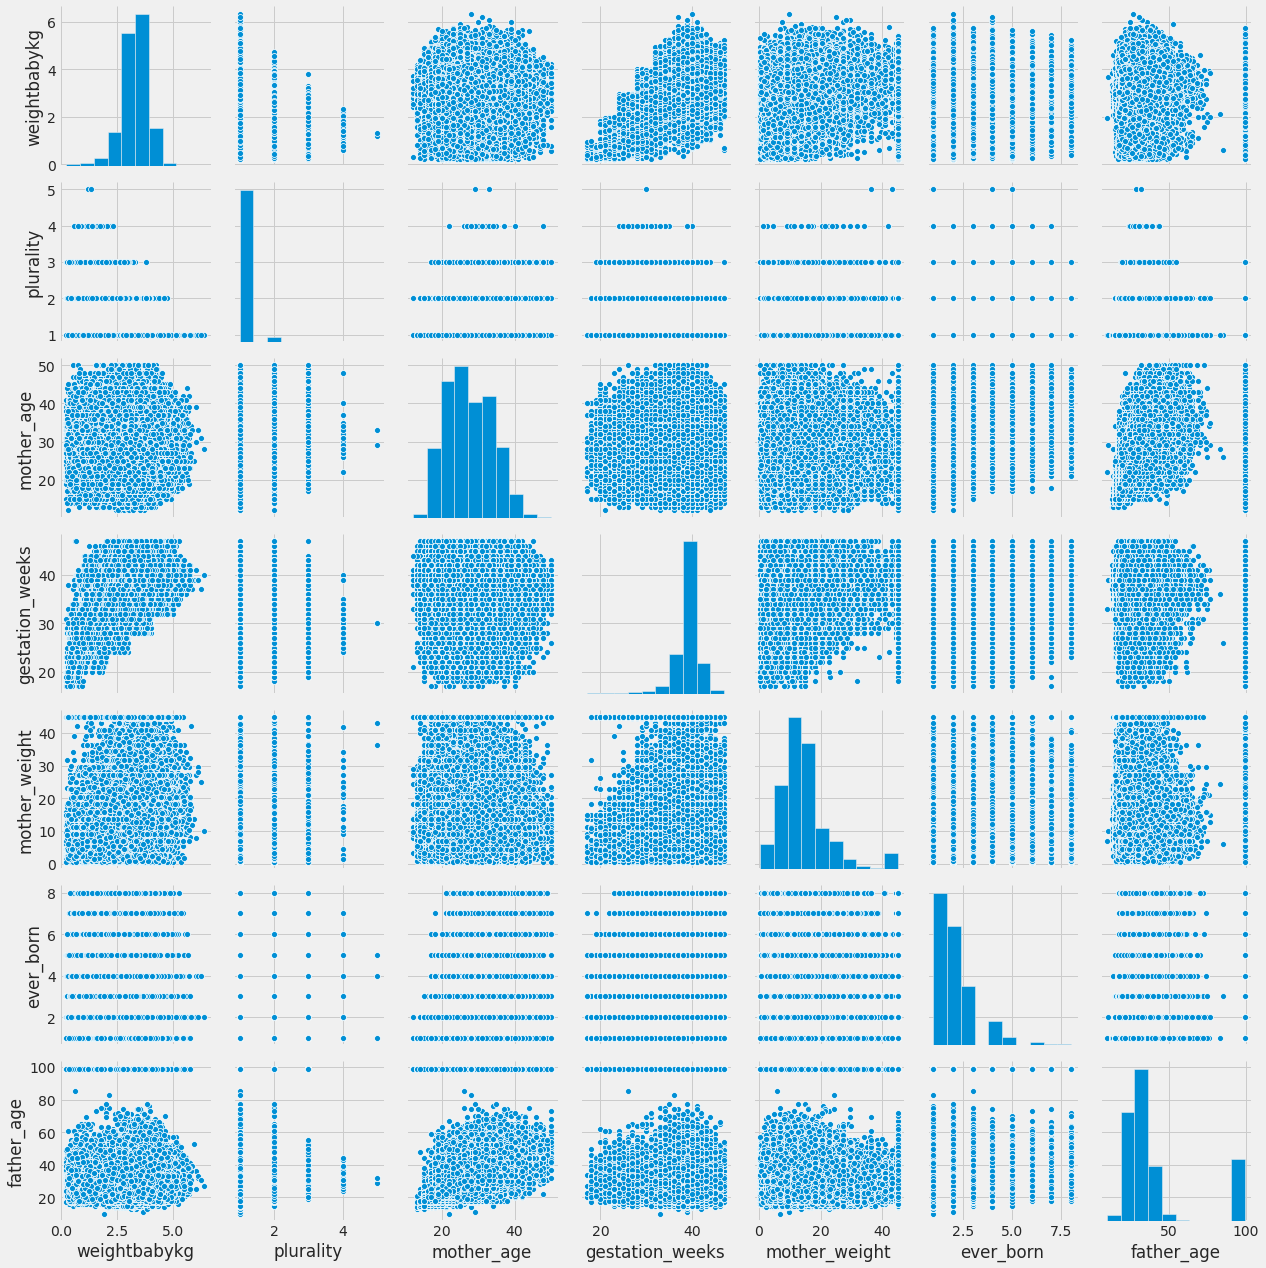

In [0]:
#Checking the distribution of the data
plt.figure(figsize=(10,10))
sns.pairplot(dataset[num])#plt.show()

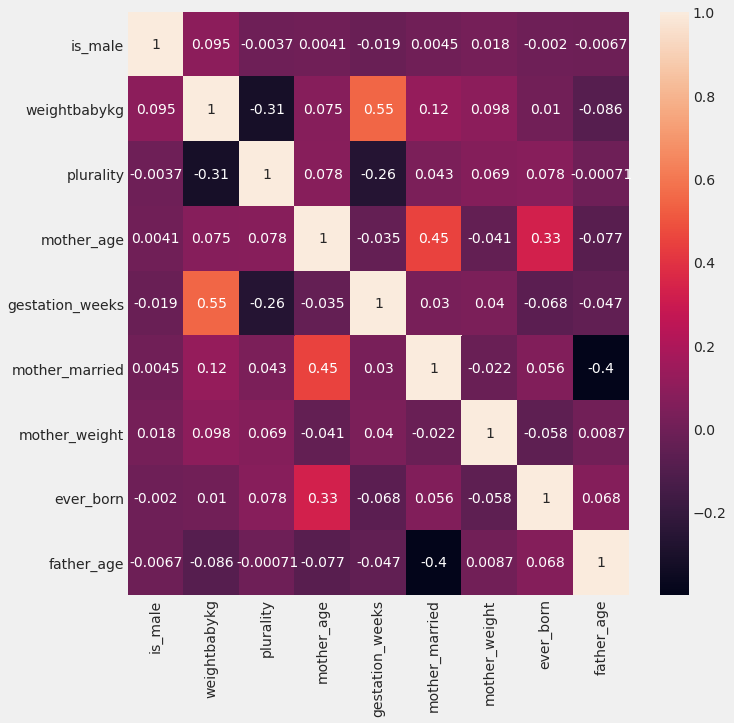

In [0]:
#Checking correlation
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)

In [0]:
#EDA
dataset.groupby(['mother_married','mother_race'])['gestation_weeks','weightbabykg','mother_weight','ever_born'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


gestation_weeks  ...  ever_born
mother_married mother_race                       ...           
False          American Indian        38.554750  ...   2.225321
               Asian Indian           38.602041  ...   1.571429
               Black                  38.096842  ...   2.071124
               Chinese                38.851528  ...   1.489083
               Filipino               38.424015  ...   1.834897
               Hawaiian               37.736364  ...   1.881818
               Japanese               38.631579  ...   1.763158
               Korean                 39.265306  ...   1.469388
               Unknown/Other          38.413348  ...   1.934941
               Vietnamese             39.000000  ...   1.766129
               White                  38.670734  ...   1.872880
True           American Indian        38.575870  ...   2.482258
               Asian Indian           38.596722  ...   1.620876
               Black                  38.179156  ...   2.407860
               Chinese                38.783784  ...   1.646228
               Filipino               38.370902  ...   1.988525
               Hawaiian               38.175439  ...   2.500000
               Japanese               38.604374  ...   1.711730
               Korean                 38.974146  ...   1.714681
               Unknown/Other          38.667598  ...   1.879420
               Vietnamese             38.465438  ...   1.883257
               White                  38.668888  ...   2.072004

[22 rows x 4 columns]